In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

In [ ]:
df_encoded = pd.read_csv("encoded_features.csv")
df_profile = pd.read_csv("cluster_profile.csv")
df_lrfs = pd.read_csv("lrfs_features.csv")

print("✅ Data Loaded Successfully!")
print("Encoded Features Shape:", df_encoded.shape)
print("LRFS Features Shape:", df_lrfs.shape)

✅ Data Loaded Successfully!
Encoded Features Shape: (12330, 4)
LRFS Features Shape: (12330, 5)


In [ ]:
from sklearn.cluster import KMeans

# Reload your encoded features
df_encoded = pd.read_csv("encoded_features.csv")

# Run KMeans again (use same k as before)
kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded[['Dim1', 'Dim2']])

# Save updated version
df_encoded.to_csv("encoded_features.csv", index=False)
print("✅ Re-added 'Cluster' column successfully!")


✅ Re-added 'Cluster' column successfully!


In [ ]:
df_final = pd.concat([df_lrfs, df_encoded[['Cluster']]], axis=1)


In [ ]:
X = df_final[['L', 'R', 'F', 'S']]
y = df_final['Cluster']

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

RandomForestClassifier(n_estimators=200, random_state=42)

/tmp/ipython-input-2706734423.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='mako')


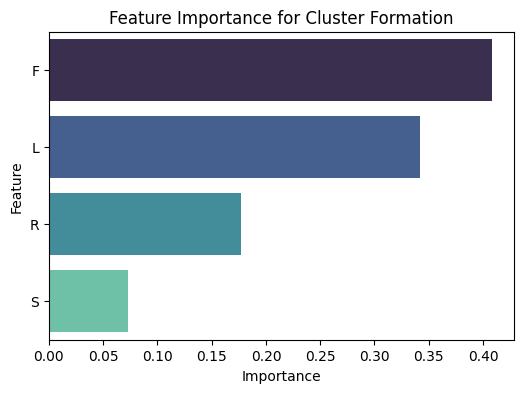

In [ ]:
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='mako')
plt.title("Feature Importance for Cluster Formation")
plt.show()

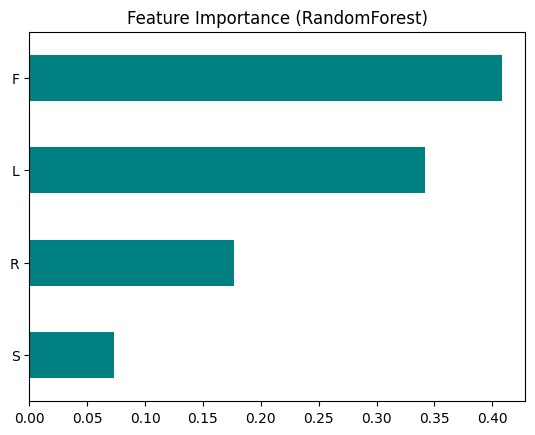

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title("Feature Importance (RandomForest)")
plt.show()

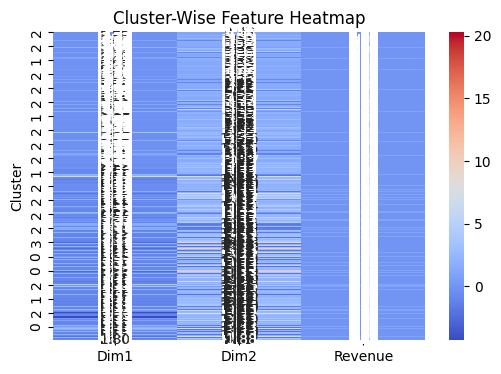

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df_profile.set_index('Cluster'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cluster-Wise Feature Heatmap")
plt.show()

In [ ]:
fig = px.scatter(
    df_encoded,
    x='Dim1',
    y='Dim2',
    color='Cluster',
    hover_data=['Revenue'],
    title='Customer Segmentation Clusters (Latent 2D Space)',
    color_continuous_scale='viridis'
)
fig.show()

In [ ]:
fig2 = px.bar(
    df_profile,
    x='Cluster',
    y='Revenue',
    color='Cluster',
    title='Average Revenue per Cluster',
    color_continuous_scale='Plasma'
)
fig2.show()

In [ ]:
df_profile.to_csv("final_cluster_profile.csv", index=False)
print("✅ Final Cluster Profile saved successfully!")

✅ Final Cluster Profile saved successfully!
